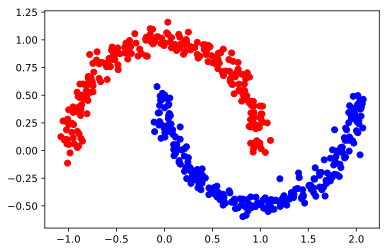

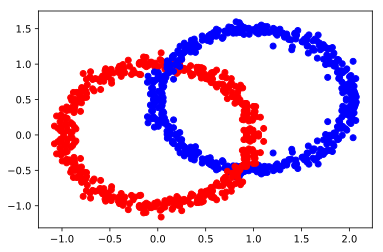

In [87]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg', 'pdf')

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification

n = 500
n_labeled = 10
alpha = 0.99
sigma = 0.2

X, Y = make_moons(n, shuffle=True, noise=0.06, random_state=None)

color = ['red' if l == 0 else 'blue' for l in Y]
plt.scatter(X[0:,0], X[0:,1], color=color)
# plt.savefig("ideal_classification.pdf", format='pdf')
plt.show()

X_ = np.copy(X)
for i in range(len(X)):
    if Y[i] == 1:
        X_[i, 1] = 1 - X[i, 1]
    else:
        X_[i, 1] = -X[i, 1]

X = np.append(X, X_)
X = np.reshape(X, (1000, 2))
Y = np.append(Y, Y)
color = np.append(color, color)

plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()

# plt.title("Two informative features, one cluster per class", fontsize='small')
# X, Y = make_classification(n_features=6, n_redundant=3, n_informative=2,
#                              n_clusters_per_class=1)
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
#             s=25, edgecolor='k')
# plt.show()

In [67]:
# # admm method
# from admm_algorithms import admm
# import numpy as np

# length = len(X)
# graph = np.zeros((length, length))
# for i in range(length):
#     for j in range(length):     
#         diff = (X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2
#         graph[i, j] = abs(math.sqrt(diff))

# # admm
# vals, vectors = np.linalg.eigh(graph)
# vals, vectors = np.real(vals), np.real(vectors)
# index1, index2, index3 = np.argsort(vals)[0], np.argsort(vals)[1], np.argsort(vals)[2]
# ev = vectors[:, index1]

# label = admm(ev, num_cuts=1, n_iter=10000)
# print(np.unique(label))
    
# color = ['red' if l == 0 else 'blue' for l in label]
# plt.scatter(X[0:,0], X[0:,1], color=color)
# plt.show()

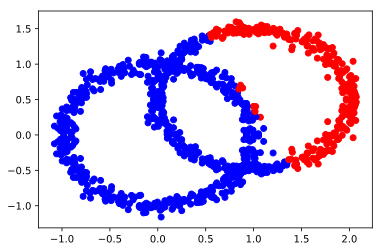

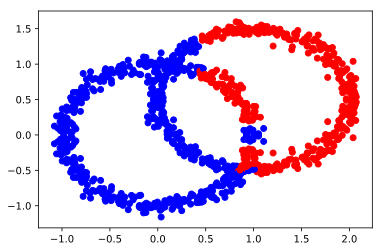

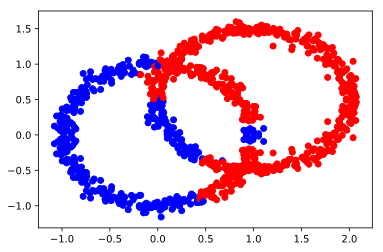

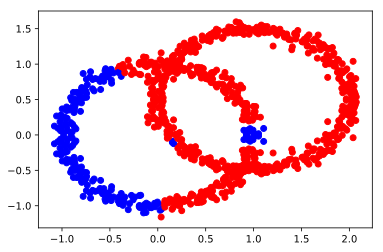

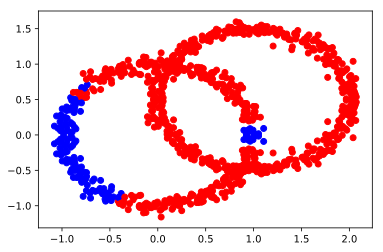

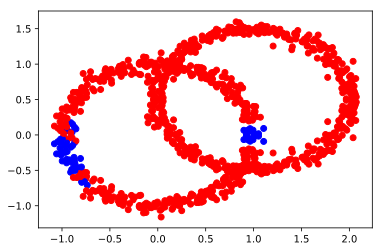

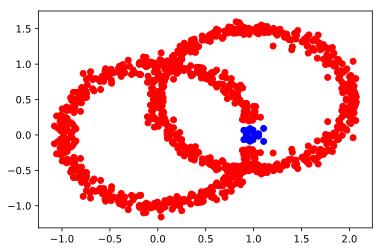

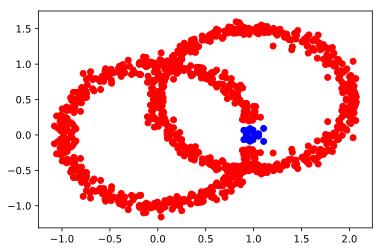

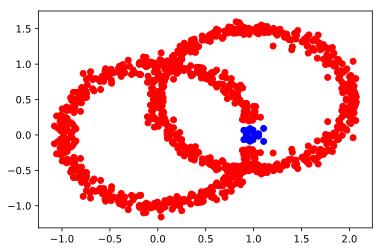

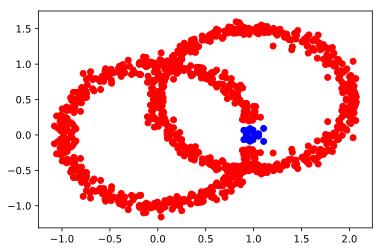

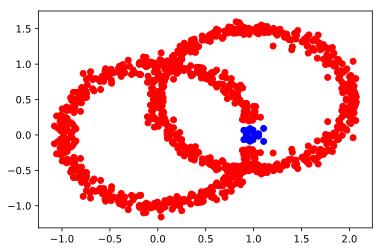

In [89]:
# EM method
from admm_algorithms import admm
import numpy as np


length = len(X)
graph = np.zeros((length, length))

        
# generate label first by admm method
for i in range(length):
    for j in range(length):     
        diff = (X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2
        graph[i, j] = abs(math.sqrt(diff))

        
rank_order = np.zeros((length, length))
for i in range(length):
    sort_array = np.sort(graph[i, :])
    for j in range(length):
        indice = np.where(sort_array == graph[i, j])        
        rank_order[i, j] = indice[0][0]

# def knn(i, j, k, t):
#     for i in range(length):
#         array = np.argsort(graph[i, :])
#         for j in range(length):
            
# admm
vals, vectors = np.linalg.eigh(graph)
vals, vectors = np.real(vals), np.real(vectors)
index1, index2, index3 = np.argsort(vals)[0], np.argsort(vals)[1], np.argsort(vals)[2]
ev = vectors[:, index1]
label = admm(ev, num_cuts=1, n_iter=10000)

color = ['red' if l == 0 else 'blue' for l in label]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()

iter_count = 0
rank_num = 5
while iter_count < 10:
#     graph = np.zeros((length, length))

    # local constraint method    
    for i in range(length):
        for j in range(length):     
            if label[i] != label[j]:
#                 if knn(i, j) + knn(j, i):
                if rank_order[i, j] <= rank_num or rank_order[j, i] <= rank_num:
                    label[i] = 0
                    label[j] = 0
                
#                 # i, j has local relation
#                 if rank_order[i, j] <= rank_num or rank_order[j, i] <= rank_num:
#                     diff = 0
#                 else:
#                     diff = math.sqrt((X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2)
                    
#                 graph[i, j] = abs(diff)
                
#             else:
#                 diff = (X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2
#                 graph[i, j] = abs(math.sqrt(diff))
                

    # admm
#     vals, vectors = np.linalg.eigh(graph)
#     vals, vectors = np.real(vals), np.real(vectors)
#     index1, index2, index3 = np.argsort(vals)[0], np.argsort(vals)[1], np.argsort(vals)[2]
#     ev = vectors[:, index1]
#     label = admm(ev, num_cuts=1, n_iter=10000)
#     print(np.unique(label))

    iter_count += 1
    
    color = ['red' if l == 0 else 'blue' for l in label]
    plt.scatter(X[0:,0], X[0:,1], color=color)
    plt.show()